
# Notebook: Principal Component Analysis

In this notebook, we present the **Principal Component Analysis** algorithm and related applications such as data visualization or data compression.

## Contents
The structure of the notebook is as follows:
* Introducing Principal Component Analysis
* PCA as dimensionality reduction
* PCA for visualization: Wisconsin Diagnostic Breast Cancer Database
* Choosing the number of components
* Using PCA to find the perfect human


## Sources
<!--BOOK_INFORMATION-->
*This notebook has been modified by Aythami Morales from:

i) the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas.*

ii) the BE/Bi 103 Data Analysis in the Biological Sciences [PCA tutorial](http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2016/tutorials/aux4_pca.html) by Heidi Klumpe and Manuel Razo.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# seaborn is a package for statistical data visualization
import seaborn as sns; sns.set()

## 1. Introducing Principal Component Analysis

Principal component analysis (PCA) is a fast and flexible unsupervised method for dimensionality reduction in data. PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of distinct principal components is equal to the smaller of the number of original variables or the number of observations minus one. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

Its behavior is easiest to visualize by looking at a synthetic two-dimensional dataset.
Consider the following 200 points:

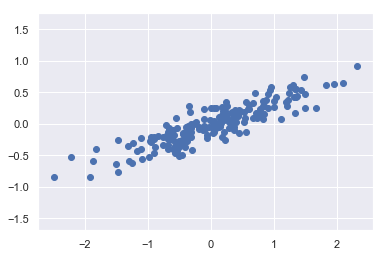

In [2]:
# data.npy contains a synthetically generated two-dimensional data with 200 points
X=np.load('./data/data.npy')
# plot the 2 variables x0, x1
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

We can observe the different distribution of $x_{0}$ and $x_{1}$ in our data by its projections:

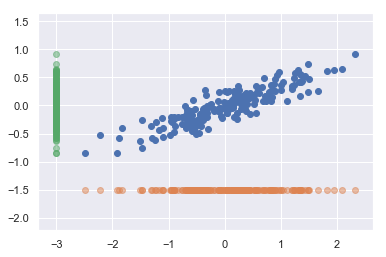

In [3]:
# plot the 2 variables x0, x1
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');
# plot the projections into horizontal and vertical axes (only visualization purpose)
plt.scatter(X[:, 0], -1.5*np.ones(len(X[:, 0])), alpha=0.5)
plt.scatter(-3*np.ones(len(X[:, 1])), X[:, 1], alpha=0.5)

By eye, it is clear that there is a nearly linear relationship between the $x_{0}$ and $x_{1}$ variables. The unsupervised learning problem attempts to learn about the *relationship* between the $x_{0}$ and $x_{1}$ values.

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset. Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [4]:
# import PCA module from sklearn
from sklearn.decomposition import PCA
# define the PCA algorithm parameters, in this example only the number of components
pca = PCA(n_components=2)
# fit PCA algorithm to your data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

The fit learns some quantities from the data, most importantly the "components", explained variance" and  "explained variance ratio":

In [5]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [6]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


In [7]:
print(pca.explained_variance_ratio_)

[0.97634101 0.02365899]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

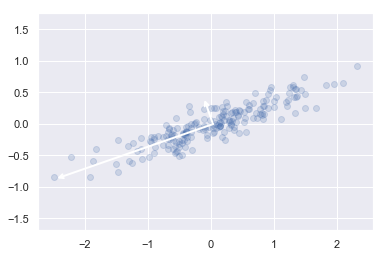

In [8]:
#add your modules to the path
import sys
sys.path.append('./my_modules')

#my_module is an example of python module created to include your functions
import my_module

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

# plot vectors to visualize the variance of the data
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    my_module.draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.

The projection of each data point onto the principal axes are the "principal components" of the data.


This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

## 2. PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [9]:
# define the PCA parameters, only 1 component in this example
pca = PCA(n_components=1)
# fit PCA algorithm to your data
pca.fit(X)
# project the data according to the PCA components (1 component in this example)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

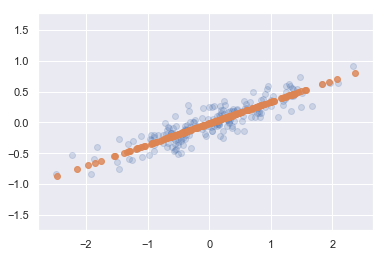

In [10]:
# reconstruction of the data from the projection
X_new = pca.inverse_transform(X_pca)
# plot the original data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
# plot the reconstructed data
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

## 3. PCA for visualization: Wisconsin Diagnostic Breast Cancer Database

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.

To see this, let's take a quick look at the application of PCA to the 'Wisconsin Diagnostic Breast Cancer' from the UCI repository (<https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)>). The task of interest is to predict whether or not a cell corresponds to a malignant tumor. In this dataset all attributes (32 attributes) take real values. These include area, smoothness, perimeter, etc.

We start by loading the data:

In [11]:
# read the data, 30 features for each record
data = pd.read_csv('./data/wdbc.csv',header=None) #as there is no header in this case
X = data.values[ :, 2:].astype(np.float)
# as a supervised problem, we have an associated label (benign, malign) to each sample on X
y = (data.values[ :, 1 ] == 'B').astype(np.int)
target_names = np.array([('benign'), ('malign')], dtype=np.dtype('U10'))
                 
# make a DataFrame with a species column for the first 5 features. Note that the last element is not included in the selection
X5 = X[ :, 0:5].astype(np.float)
df_cancer = pd.DataFrame(X5)
df_cancer['target'] = target_names[y]

# take a look at df_cancer. 
df_cancer.head(5)

,0,1,2,3,4,target
0,17.99,10.38,122.80,1001.0,0.11840,benign
1,20.57,17.77,132.90,1326.0,0.08474,benign
2,19.69,21.25,130.00,1203.0,0.10960,benign
3,11.42,20.38,77.58,386.1,0.14250,benign
4,20.29,14.34,135.10,1297.0,0.10030,benign


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


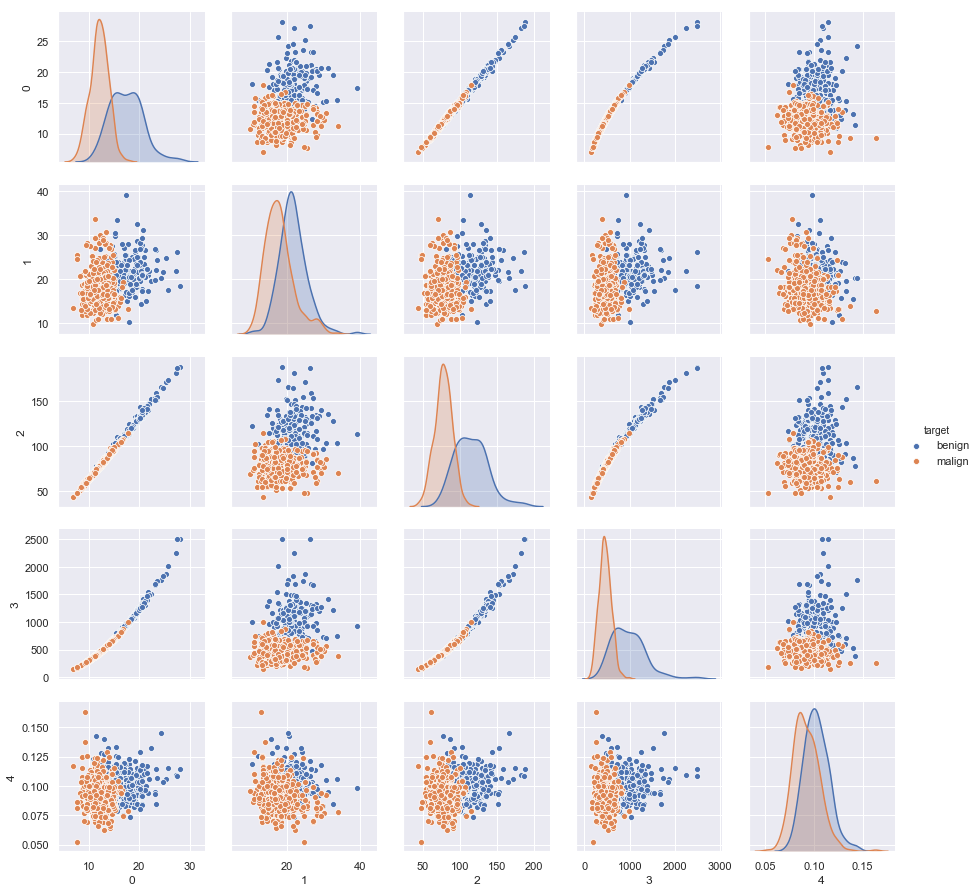

In [12]:
# Plot pairwise comparison to explore the data
_ = sns.pairplot(df_cancer, hue='target')

plt.show()

<br>
<font color='red'>Based on the previous figure, perform an analysis here based on the the feature (out of the 5 shown) you think it is the most discriminative between malign/benign. Also analyse the figure and comment if you think there are some features that are correlated.  </font> 
    
<font color='red'>   ADD YOUR ANALYSIS</font> 
<br>
<br>
<br>
<br>
<br>

Recall that the data consists of 569x32 matrix, meaning that they are 32-dimensional feature vectors from 569 samples. We ignore the first attribute in this dataset, which corresponds to the ID of each sample. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

To gain some intuition into the relationships between features, we can use PCA to project them to a more manageable number of dimensions, say two:

In [13]:
# define the PCA parameters, 4 components in this example
pca = PCA(n_components=4) 
# project from 30 to 4 dimensions according to the PCA components
X_r = pca.fit(X).transform(X)
print(X.shape)
print(X_r.shape)


print('explained variance ratio (first 4 components): %s'
      % str(pca.explained_variance_ratio_))


(569, 30)
(569, 4)
explained variance ratio (first 4 components): [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04]


We can now plot the first two principal components of each point to learn about the data:

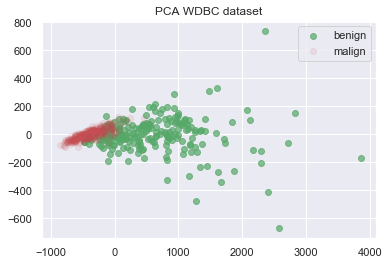

In [14]:
plt.figure()
comp1=0; #first component to visualize, you can modify it
comp2=1; #second component to visualize, you can modify it

# plot the two components selected above for both malign and benign tumors
plt.scatter(X_r[y == 0, comp1], X_r[y == 0, comp2], color='g', alpha=.7, lw=1,
                label='benign')

plt.scatter(X_r[y == 1, comp1], X_r[y == 1, comp2], color='r', alpha=.1, lw=1,
                label='malign')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA WDBC dataset')

plt.show()

Recall what these components mean: the full data is a 30-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.

Essentially, we have found the optimal stretch and rotation in 30-dimensional space that allows us to see the layout of the data in two dimensions.

## 4. Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

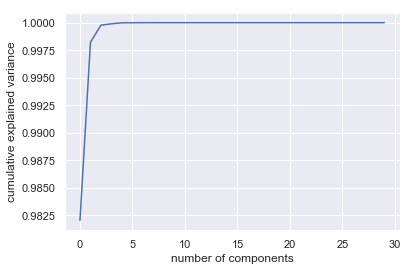

In [15]:
# fit PCA algorithm to your data
pca = PCA().fit(X) #as we do not specify the number of components, it uses all, the 30
# plot the variance ratio according to the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 30-dimensional variance is contained within the first $N$ components.
For example, we see that with the WDBC dataset the first 2 components contain approximately 99% of the variance.

Here we see that our two-dimensional projection loses a reduced amount of information (as measured by the explained variance) and that we'd need only two features (in the transformed domain) to retain 99% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

<br>
<font color='red'>
    
    Everyting till now has been using PCA without applying data normalization. We have seen in the Theory class this is an important aspect that is needed to be peformed before applying PCA to our data. Repeat the last two examples preprocessing the data by removing the mean and dividing by the standard deviation. 
    
    You
    
    Based on the previous figure, perform an analysis here based on the the feature (out of the 5 shown) you think it is the most discriminative between malign/benign. Also analyse the figure and comment if you think there are some features that are correlated.  </font> 
    
<font color='red'>   ADD YOUR ANALYSIS</font> 
<br>
<br>
<br>
<br>
<br>